# Muhammad Rizwan Khalid
# BSCS - 6A
# 180459

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import PIL
import itertools
import math

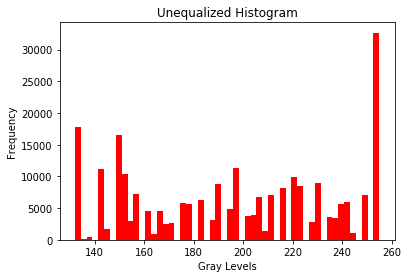

In [44]:
img = Image.open('hist.tif').convert('L')
temp = np.array(img)
temp = temp.flatten()
plt.hist(temp,bins='auto',color='r')
plt.title("Unequalized Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Frequency")
plt.show()

In [45]:
pixel = dict()
count =0
for x,y in itertools.product(range(img.size[0]),range(img.size[1])):
    pixel_value = img.getpixel((x,y))
    count+=1
    if int(pixel_value) in pixel.keys():
        pixel[pixel_value] +=1
    else:
        pixel[pixel_value] = 1
maximum = max(pixel.keys())

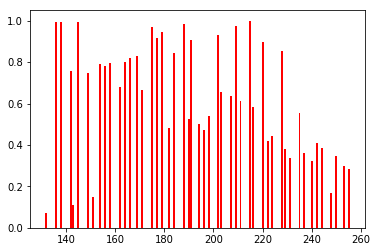

In [46]:
for x in pixel:
    pixel[x] =float(float(pixel[x])/float(count))
comulative = dict()
count = 0
for i in pixel:
    count += pixel[i]
    comulative[i] = count
plt.clf()
plt.bar(comulative.keys(),comulative.values(),color = 'r')
plt.show()

In [47]:
img = Image.new(img.mode, img.size)
equalized_pixels = img.load()
for x,y in itertools.product(range(img.size[0]),range(img.size[1])):
    temp = img.getpixel((x,y))
    temp1 = comulative[temp]
    eql = math.floor(maximum*temp1) #equalizing
    equalized_pixels[(x, y)]=int(eql)
img.show()

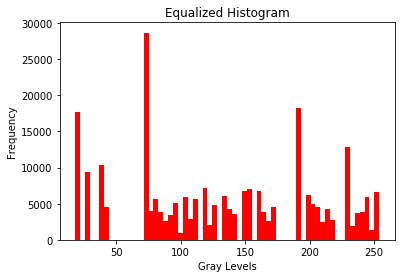

In [48]:
temp = np.array(img)
temp = temp.flatten()
plt.hist(temp,bins='auto',color='r')
plt.title("Equalized Histogram")
plt.xlabel("Gray Levels")
plt.ylabel("Frequency")
plt.show()

### Does the equalized histogram has a uniform distribution?
### Ans. 
Discrete histogram is the approximation of continuous probability density function. In short, no new intensity levels are being created in the equalization process. Normally, the intensity values are in floating points which we cannot represent in discrete domain. They have been rounded down to lower interger value by using int function (which is equivalent to floor function)

# END